In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tqdm

from PyKomoran import *

komoran = Komoran(DEFAULT_MODEL['FULL'])
komoran.set_user_dic('D:/petition/user_dic.dic')

pd.options.display.max_rows

data = pd.read_pickle("clean_data_for_sentiment_classification.pkl")
data.head()

,index,code,sdays,edays,title,count,content,category,progress,link,person,pre_content,prior_content,for_content,summary_content,summary_content_end
0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,https://www1.president.go.kr/petitions/579353,"['청원인kakao - ***', '']",“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...
1,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,https://www1.president.go.kr/petitions/579401,"['청원인naver - ***', '']",연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...
2,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,https://www1.president.go.kr/petitions/579426,"['청원인naver - ***', '']",문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...
3,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,https://www1.president.go.kr/petitions/579523,"['청원인naver - ***', '']",세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...
4,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,https://www1.president.go.kr/petitions/579585,"['청원인naver - ***', '']",안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...


In [26]:
import numpy as np
from konlpy.tag import Okt
from konlpy.tag import Mecab


def tokenize_okt(comment):
    """
    ** 참고 - konlpy.Okt 패키지 사용 **
    :param comment: 뉴스 댓글 문장 하나
    :return: 문장을 token단위로 쪼갠 후 리스트로 반환
    """
    okt = Okt()
    malist = okt.pos(comment, norm=True, stem=True)
    r = []

    tag_list = ['Noun', "Verb", 'Adjective', "Adverb", "Determiner", "Exclamation", "Emotion"]

    # 불용어 추가
    stopwords = ['하다', ',', '들', '이', '..', '.', '것', '다', '이다', '~', '그', '그녀', '저', '...', '"', '~~',"것", "이", "안","연합뉴스", "더", "왜", "때", "좀", "뭐", "거", "저", "뿐", "머","청원","오","수","년","끼","하",'개']
 
    try:
        for word, tag in malist:
            if tag in tag_list:
                if not word in stopwords:
                    r.append(word)
        return r
    except Exception as e:
        print(e)

def tokenize_mecab(sentence):
    mecab = Mecab()
    result = [x for x in mecab.nouns(sentence) if len(x)>1]
    return result


def count_comment(token_data):
    unique_comment_tokenized = [list(i) for i in set(tuple(i) for i in token_data)]
    word_dic = {}

    # word count
    for words in unique_comment_tokenized:
        for word in words:
            if not (word in word_dic):
                word_dic[word] = 0
            word_dic[word] += 1

    keys = sorted(word_dic.items(), key = lambda x: x[1], reverse = True)
    for word, count in keys[:50]:
        print("{0}({1}) ".format(word, count), end = "")

    # [] 없애주는 코드
    from itertools import chain
    words = set(chain(*unique_comment_tokenized))

    n_vocab = len(words)
    print("")
    print("Total Vocab: ", n_vocab)
    print("")

    return keys, n_vocab



def preprocess(text):
    '''
    말뭉치 단어 별로 아이디로 변환해주는 함수
    :param text:
    :return:
    '''
    # 간단한 전처리
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    # 단어를 Id로
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                17751 non-null  int64         
 1   code                 17751 non-null  object        
 2   sdays                17751 non-null  datetime64[ns]
 3   edays                17751 non-null  datetime64[ns]
 4   title                17751 non-null  object        
 5   count                17751 non-null  float64       
 6   content              17751 non-null  object        
 7   category             17751 non-null  object        
 8   progress             17751 non-null  object        
 9   link                 17751 non-null  object        
 10  person               17751 non-null  object        
 11  pre_content          17751 non-null  object        
 12  prior_content        17751 non-null  object        
 13  for_content          17751 non-

In [8]:
data = data.drop(['link','person'], axis = 1)

In [9]:
data

,index,code,sdays,edays,title,count,content,category,progress,pre_content,prior_content,for_content,summary_content,summary_content_end
0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...
1,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...
2,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...
3,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...
4,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,17746,597284,2021-03-30,2021-04-29,보육교사 월1회 코로나검사에대해 반대합니다!,91910.0,['저는 어린이집에서 근무하는 보육교사입니다길어지고 끝이안보이는 코로나로인해 모든국...,인권/성평등,청원진행중,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...
17747,17747,597285,2021-03-30,2021-04-29,사람 목숨을 가지고 장난치는 악덕업자를 구속하여 주세요.......,1263.0,"['저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원 입니다,정말 분...",기타,청원진행중,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...
17748,17748,597286,2021-03-30,2021-04-29,4차재난지원금 소상공인 버팀목자금 플러스,2767.0,['왜 4차재난지원금에 19년대비 20년도 매출을 고집하시나요영업제한으로 피해를 본...,기타,청원진행중,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,,,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...
17749,17749,597287,2021-03-30,2021-04-29,백혈병환자가족에게 코로나19백신 최우선접종을 청원합니다.,1106.0,['저는 백혈백 환자를 아들(21세)로 두고 있습니다. 부산 **동에 살고 있으며 ...,보건복지,청원진행중,저는 백열백 환자를 아들 21세로 두고 있습니다. 부산 동에 살고 있으며 나이는 ...,저는 백열백 환자를 아들 21세로 두고 있습니다,부산 동에 살고 있으며 나이는 58세이고 제 아내는 54세 큰아들은 24세입니다 ...,부산 동에 살고 있으며 나이는 58세이고 제 아내는 54세 큰아들은 24세입니다 ...,저는 백열백 환자를 아들 21세로 두고 있습니다 부산 동에 살고 있으며 나이는 ...


### Tokenize
* 추출 태그: 명사, 어근, 동사, 형용사
* stopwords:  ["것", "이", "안", "더", "왜", "때", "좀", "뭐", "거", "저", "뿐", "머"]

In [10]:
token_data = []

for comment in tqdm.tqdm(data.content):
    token = tokenize_okt(comment)
    token_data.append(token)

100%|████████████████████████████████████████████████████████████████████████████| 17751/17751 [49:46<00:00,  5.94it/s]


In [11]:
keys, n_vocab = count_comment(token_data)

있다(130826) 되다(82328) 없다(51173) 않다(47473) 되어다(42007) 받다(35767) 국민(30818) 아니다(29718) 보다(27031) 제(22187) 등(22022) 사람(20404) 생각(20191) 말(18747) 아이(18247) 같다(15870) 가다(15791) 많다(15707) 상황(14699) 및(14485) 일(14380) 대한(14258) 해주다(14169) 위(14000) 정부(13977) 코로나(13577) 내용(13194) 저희(13064) 위해(12692) 우리(12321) 지금(12155) 그렇다(11680) 현재(11660) 오다(11472) 사건(11419) 들다(11404) 법(11173) 문제(11104) 인하다(11081) 내(10550) 주다(10298) 후(10252) 한(10102) 때문(9955) 이렇다(9813) 시키다(9719) 또한(9466) 피해(9458) 사실(9289) 대한민국(9184) 
Total Vocab:  53813



In [14]:
data = data.reset_index(drop=True)
data['comment_token'] = pd.Series(token_data)
data['comment_token'].head()

data.to_pickle("clean_data_okt_content0429.pkl")

In [9]:
data = pd.read_pickle("clean_data_okt_content0429.pkl")

In [10]:
tokens = data['comment_token']
tokens[:5]

0    [정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ...
1    [군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ...
2    [문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,...
3    [안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버...
4    [안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축...
Name: comment_token, dtype: object

### Word Embedding
* tokenized_comments
    * word2vec
    * fastText
* 자모 단위 분해 + fastText

In [17]:
import codecs
from gensim.models import word2vec
from gensim.models import fasttext

In [18]:
import multiprocessing
config = {
    'min_count': 2,  # 등장 횟수가 1 이하인 단어는 무시
    'size': 300,  # 300차원짜리 벡터스페이스에 embedding
    'sg': 1,  # 0이면 CBOW, 1이면 skip-gram을 사용한다
    'batch_words': 10000,  # 사전을 구축할때 한번에 읽을 단어 수
    'iter': 50,  
    'workers': multiprocessing.cpu_count(),
    'window': 5,
    'seed': 42
}

In [15]:
model_w2v = word2vec.Word2Vec(tokens,**config)  # 학습

In [16]:
model_w2v.save(os.path.join("../../petition/model/w2v_model_okt_0429"))  # 저장

C:\Users\a0105\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  # compatibility.  It works exactly like smart_open.open when the passed


In [19]:
w2v_model = word2vec.Word2Vec.load("../../petition/model/w2v_model_okt_0429")  # 불러오기

### Test

In [22]:
w2v_model.wv.most_similar(positive = "코로나")

[('바이러스', 0.6675755977630615),
 ('확산', 0.6163668632507324),
 ('사태', 0.5653409361839294),
 ('감염', 0.5548983216285706),
 ('코로나바이러스', 0.5377178192138672),
 ('감염증', 0.5346688032150269),
 ('수퍼', 0.5241361856460571),
 ('러스', 0.5238735675811768),
 ('신종', 0.5221794843673706),
 ('대련시', 0.5217272639274597)]

In [23]:
w2v_model.wv.most_similar(positive = "주식")

[('주식시장', 0.6431766152381897),
 ('투자자', 0.6398089528083801),
 ('주주', 0.6239807605743408),
 ('공매도', 0.6097897887229919),
 ('투자', 0.5991721749305725),
 ('신주', 0.5837640762329102),
 ('삼전', 0.5801690816879272),
 ('탁원', 0.5757423639297485),
 ('중소형주', 0.5692002177238464),
 ('이봉규', 0.5653735995292664)]

In [24]:
w2v_model.wv.most_similar(positive = "대통령")

[('문재인', 0.8481661081314087),
 ('존경', 0.6295692920684814),
 ('신년사', 0.5909133553504944),
 ('박병석', 0.5664097666740417),
 ('김영남', 0.5509283542633057),
 ('반지르르하다', 0.5505431294441223),
 ('퇴임후', 0.5501688718795776),
 ('대국민사과', 0.5440603494644165),
 ('취임식', 0.5430626273155212),
 ('도널드', 0.5410699844360352)]

### Labeling Emotion

In [27]:
from collections import Counter
import itertools

In [28]:
emotion = pd.read_excel('../../petition/감정단어사전0603.xlsx')
emotion = emotion[['단어','감정범주']]
emotion['감정범주'].value_counts()

슬픔     161
분노     118
기쁨      95
혐오      46
놀람      36
공포      28
지루함     16
흥미      13
통증       6
기타       6
중성       4
Name: 감정범주, dtype: int64

In [29]:
emotion['감정범주'] = emotion['감정범주'].map(lambda x: x.replace("통증","공포"))
emotion['감정범주'] = emotion['감정범주'].map(lambda x: x.replace("지루함","혐오"))

In [30]:
emotion['감정범주'][106] = '공포'

In [31]:
emotion = emotion[~emotion['감정범주'].isin(['흥미','기타','중성','기쁨','놀람'])]
emotion['감정범주'].value_counts()

슬픔    161
분노    118
혐오     62
공포     35
Name: 감정범주, dtype: int64

In [32]:
# 감정 리스트에 변수 할당 
six_emotion = list(emotion['감정범주'].unique())
print(six_emotion)

for emo in six_emotion:
    # 단어 사전에서 emo_words 받아오기
    emo_words = emotion[emotion['감정범주']==emo]['단어'].tolist() 
    #단어 토큰화, 토큰화 후 nan값 된 단어 제거
    emo_words = [tokenize_okt(x)[0] for x in emo_words if len(tokenize_okt(x))>1]
    # 중복 제거
    emo_words = sorted(list(set(emo_words)))
    # 각 감정변수에 차례대로 할당
    globals()[emo] = emo_words
    print(emo)
    

['혐오', '슬픔', '분노', '공포']
혐오
슬픔
분노
공포


In [33]:
disgust = 혐오
sad = 슬픔
angry = 분노
fear = 공포

In [34]:

bi_sad = [('가슴','아프다'),('기운','없다'),('남','부럽다'),('뒤','숭숭'),('맥','빠지다'),
              ('복','받치다'),('뼈','아프다'),('뼈','저리다'),('애','끓다'),('애','닮다'),
              ('애','타다'),('처','연하다'),('속','썩다'),('속','앓이'),('속','타다')]

bi_disgust =  [('못','밉다'),('정','떨어지다'),('못','마땅하다'),('시','덥다'),('남','부끄럽다'),
                   ('징','그렇다'),('뼈','저리다'),('애','끓다'),('애','닮다'),('처','연하다'),
                   ('속','썩다'),('속','앓이'),('속','타다')]

bi_angry = [('못','되다'),('삐','딱하다'),('비','딱하다'),('약','오르다'),('치','떨리다'),
                ('치밀','오르다'),('성','나다'),('못','마땅하다'),('정','떨어지다'),('남','부끄럽다'),('열','받다')]
bi_fear = [('뒤','숭숭')]

In [35]:
test = ["가슴 아프다 정말", #- sad
        "요즘 상황이 뒤숭숭하다",#sad fear
        "어어어어엉 우웅우 감동스럽다",#happy
       "낯간지러워"]
        
test_token = []
for i in test:
    test_token.append(tokenize_okt(i))
print(test_token)

[['가슴', '아프다', '정말'], ['요즘', '상황', '뒤', '숭숭'], ['어어', '엉', '우웅', '우', '감동', '스럽다'], ['낯', '간지럽다']]


In [36]:
data

,index,code,sdays,edays,title,count,content,category,progress,pre_content,prior_content,for_content,summary_content,summary_content_end,comment_token
0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ..."
1,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,"[군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ..."
2,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,"[문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,..."
3,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,"[안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버..."
4,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,"[안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,17746,597284,2021-03-30,2021-04-29,보육교사 월1회 코로나검사에대해 반대합니다!,91910.0,['저는 어린이집에서 근무하는 보육교사입니다길어지고 끝이안보이는 코로나로인해 모든국...,인권/성평등,청원진행중,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,"[어린이집, 근무, 보육, 교사, 길어지다, 끝, 이안, 보이다, 코로나, 인하다,..."
17747,17747,597285,2021-03-30,2021-04-29,사람 목숨을 가지고 장난치는 악덕업자를 구속하여 주세요.......,1263.0,"['저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원 입니다,정말 분...",기타,청원진행중,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,"[서해, 바다, 구조대, 로써, 활동, 있다, 구조대, 정말, 분하다, 차다, 수가..."
17748,17748,597286,2021-03-30,2021-04-29,4차재난지원금 소상공인 버팀목자금 플러스,2767.0,['왜 4차재난지원금에 19년대비 20년도 매출을 고집하시나요영업제한으로 피해를 본...,기타,청원진행중,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,,,왜 4차 재난지원금에 19년 대비 20년도 매출을 고집하시나요 영업제한으로 피해를...,"[차, 재난, 원금, 매출, 고집, 영업, 제한, 피해, 보다, 현재, 인, 이상,..."
17749,17749,597287,2021-03-30,2021-04-29,백혈병환자가족에게 코로나19백신 최우선접종을 청원합니다.,1106.0,['저는 백혈백 환자를 아들(21세)로 두고 있습니다. 부산 **동에 살고 있으며 ...,보건복지,청원진행중,저는 백열백 환자를 아들 21세로 두고 있습니다. 부산 동에 살고 있으며 나이는 ...,저는 백열백 환자를 아들 21세로 두고 있습니다,부산 동에 살고 있으며 나이는 58세이고 제 아내는 54세 큰아들은 24세입니다 ...,부산 동에 살고 있으며 나이는 58세이고 제 아내는 54세 큰아들은 24세입니다 ...,저는 백열백 환자를 아들 21세로 두고 있습니다 부산 동에 살고 있으며 나이는 ...,"[혈, 환자, 아들, 세, 로, 두다, 있다, 

In [37]:
data['comment_token']

0        [정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ...
1        [군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ...
2        [문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,...
3        [안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버...
4        [안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축...
                               ...                        
17746    [어린이집, 근무, 보육, 교사, 길어지다, 끝, 이안, 보이다, 코로나, 인하다,...
17747    [서해, 바다, 구조대, 로써, 활동, 있다, 구조대, 정말, 분하다, 차다, 수가...
17748    [차, 재난, 원금, 매출, 고집, 영업, 제한, 피해, 보다, 현재, 인, 이상,...
17749    [혈, 환자, 아들, 세, 로, 두다, 있다, 부산, 동, 살, 있다, 나이, 세이...
17750    [한복, 아직도, 우리나라, 문화재, 지정, 되어다, 않다, 중국, 한복, 김치, ...
Name: comment_token, Length: 17751, dtype: object

In [38]:
emo_set = [disgust, sad, angry, fear]
emo_bigram_set = [bi_disgust, bi_sad, bi_angry, bi_fear]

check_token_lst = []
emo_cnt_lst = []

total_num = len(data)

# comment 돌기
for i,comment in enumerate(data['comment_token']):
    print(i/total_num,end="\r")
    check_token = []
    emo_cnt = np.zeros(len(emo_set))
    
    # bigram 처리
    for j, biwords in enumerate(emo_bigram_set):
        for a, b in biwords:
             if (a in comment) & (b in comment):
                check_token.append(a+b)
                emo_cnt[j] += 1 

    # unigram 처리
    for token in comment:
        for k, words in enumerate(emo_set):
            if token in words:
                emo_cnt[k] += 1
                check_token.append(token)

    check_token_lst.append(check_token)
    emo_cnt_lst.append(emo_cnt)

In [39]:
# 비율로 환산
sum_of_emo = np.array(emo_cnt_lst).sum(axis=1,keepdims=True)

emo_ratio = np.array(emo_cnt_lst) / sum_of_emo
emo_ratio[np.isnan(emo_ratio)] = 0

emo_df = pd.DataFrame(emo_ratio,columns = ['disgust', 'sad', 'angry', 'fear'])

C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [45]:
comment_with_emo = pd.concat([emo_df,
                              data,
                              pd.DataFrame({"check":pd.Series(check_token_lst)})],
                             sort=False,axis=1)

# 최소 1개의 감정단어 등장한 댓글만 뽑기
comment_with_emo = comment_with_emo[comment_with_emo['check'].apply(len) > 0]
print(comment_with_emo.shape)
comment_with_emo.head()

(13034, 20)


,disgust,sad,angry,fear,index,code,sdays,edays,title,count,content,category,progress,pre_content,prior_content,for_content,summary_content,summary_content_end,comment_token,check
0,0.000000,0.75,0.250000,0.0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ...","[못되다, 먹다, 눈물, 죄]"
1,0.000000,0.00,1.000000,0.0,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,"연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로, 지속적인...",문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,"[군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ...","[못되다, 미치다]"
2,0.200000,0.20,0.600000,0.0,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화(化)가 국회 벽을 넘지 ...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,"[문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,...","[못되다, 처, 후, 후, 정]"
3,0.000000,0.00,1.000000,0.0,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,"안녕하세요?세간을 떠들썩하게 하고 국민을 분노하게 했던,속칭 버닝썬 사건-이하 버닝...",기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,"[안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버...",[후]
4,0.666667,0.00,0.333333,0.0,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,안녕하십니까?(사)비글구조네트워크입니다오늘 2019년 4월 15일자 KBS 9시 뉴...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,"[안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축...","[정떨어지다, 정떨어지다, 정]"


In [46]:
print("{}개의 댓글 중 {} 개의 댓글이 감정 단어를 보유.".format(len(data),len(comment_with_emo)))

17751개의 댓글 중 13034 개의 댓글이 감정 단어를 보유.


### 감정 단어 보유 비율에 따라 Labeling

In [47]:
def label_with_major_emotion(df, ratio):
    over_index = np.where((df.sad > ratio) |
                          (df.disgust > ratio) |
                          (df.angry > ratio) |
                          (df.fear > ratio))[0]

    over_df = df.iloc[over_index.tolist(),:]

    # Skipna = True will skip all the Na values 
    # find maximum along column axis 
    over_df['emotion'] = over_df.iloc[:,:4].idxmax(axis = 1, skipna = True)
    print(Counter(over_df.emotion))
    
    return over_df

label_with_major_emotion(comment_with_emo, 0.3).to_pickle("../../petition/model/okt_comment_with_emo_over0.3.pkl")

C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Counter({'angry': 6701, 'sad': 3732, 'disgust': 2469, 'fear': 120})


In [48]:
import pandas as pd
emotion_comment_df = pd.read_pickle("../../petition/model/okt_comment_with_emo_over0.3.pkl")
emotion_comment_df

,disgust,sad,angry,fear,index,code,sdays,edays,title,count,...,category,progress,pre_content,prior_content,for_content,summary_content,summary_content_end,comment_token,check,emotion
0,0.000000,0.750000,0.250000,0.0,0,579353,2019-04-01,2019-05-01,“정부아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지방안 수립을 부탁합...,281764.0,...,육아/교육,답변완료,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,” 저희는 정부에서 제공하는 아이돌봄서비스 이용 중입니다 금천구에 살면서 14개...,“정부 아이돌봄서비스 아이돌보미 영유아 폭행 강력 처벌 및 재발방지 방안 수립을 부...,"[정부, 아이돌봄, 서비스, 아이돌보미, 영유, 폭행, 강력, 처벌, 및, 재발, ...","[못되다, 먹다, 눈물, 죄]",sad
1,0.000000,0.000000,1.000000,0.0,1,579401,2019-04-04,2019-05-04,연합뉴스에 국민혈세로 지급하는 연 300억원의 재정보조금 제도의 전면 폐지를 청원합니다.,364920.0,...,문화/예술/체육/언론,답변완료,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,뉴스 통신진흥에 관한 법률’에 의거하여 국가 기간뉴스통신사로 지정된 연합뉴스는 대...,연합뉴스는 군사정권의 언론탄압이 극심했던 1980년 12월 출범한 이래로 지속적인 ...,"[군사정권, 언론, 탄압, 극심하다, 출범, 이렇다, 지속, 정부, 인사, 개입, ...","[못되다, 미치다]",angry
2,0.200000,0.200000,0.600000,0.0,2,579426,2019-04-05,2019-05-05,소방공무원을 국가직으로 전환해주세요,380769.0,...,안전/환경,답변완료,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,대통령부터 장관 국회의원까지 너 나 할 것 없이 국가직화를 통한 소방관 처우 개선...,문재인 정부가 국정과제로 추진하고 있는 소방공무원 국가직화 化 가 국회 벽을 넘지 ...,"[문재인, 정부, 국정, 과제, 추진, 있다, 소방, 공무원, 국가, 직화, 가다,...","[못되다, 처, 후, 후, 정]",angry
3,0.000000,0.000000,1.000000,0.0,3,579523,2019-04-11,2019-05-11,버닝썬 VIP룸 6인을 수사해 주세요,213327.0,...,기타,답변완료,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,현재 매체의 수사 관련들을 들여다보면 크게 두 가지 방향의 수사가 이루어지는 것 ...,세간을 떠들썩하게 하고 국민을 분노하게 했던 속칭 버닝 썬 사건 이하 버닝 썬 사...,"[안녕하다, 세간, 떠들썩하다, 국민, 분노하다, 속칭, 버닝썬, 사건, 이하, 버...",[후],angry
4,0.666667,0.000000,0.333333,0.0,4,579585,2019-04-16,2019-05-16,**대 수의대에서 실험중인 퇴역 탐지견을 구조해주십시요,217249.0,...,반려동물,답변완료,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,사 비글 구조 네트워크는 지난 1월에 이와 관련된 제보를 받고 3개월에 걸쳐 자체...,안녕하십니까 사 비글 구조 네트워크입니다 오늘 2019년 4월 15일 자 KBS 9...,"[안녕하십니까, 사, 비글, 네트워크, 늘, 뉴스, 통해, 보도, 되다, 농림, 축...","[정떨어지다, 정떨어지다, 정]",disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17745,0.000000,0.000000,1.000000,0.0,17745,597283,2021-03-30,2021-04-29,"택배노동자의 과로사를 조장하는 우정사업본부, **지방우정청, **우체국의 횡포를 막...",744.0,...,기타,청원진행중,“국민 여러분께 드리는 호소문”도와주십시오 막아주십시오 살려주십시오 택배 노동자의...,“국민 여러분께 드리는 호소문”도와주십시오 막아주십시오 살려주십시오 택배 노동자의...,사회적 합의에 역행하는 우정사업본부 지방우정청 우체국을 국민 여러분께 고발합니다 ...,사회적 합의에 역행하는 우정사업본부 지방우정청 우체국을 국민 여러분께 고발합니다 ...,“국민 여러분께 드리는 호소문”도와주십시오 막아주십시오 살려주십시오 택배 노동자의...,"[국민, 여러분, 드리다, 호, 소문, 도와주다, 막다, 살리다, 택배, 노동자, ...","[못되다, 미치다, 비]",angry
17746,0.000000,0.000000,1.000000,0.0,17746,597284,2021-03-30,2021-04-29,보육교사 월1회 코로나검사에대해 반대합니다!,91910.0,...,인권/성평등,청원진행중,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,네 물론 어린아이들과 함께 지내다 보니 어른이 보육교사가 먼저 조심하자라는 뜻에서...,저는 어린이집에서 근무하는 보육교사입니다 길어지고 끝이 안 보이는 코로나로 인해 ...,"[어린이집, 근무, 보육, 교사, 길어지다, 끝, 이안, 보이다, 코로나, 인하다,...","[네, 기분]",angry
17747,0.142857,0.142857,0.714286,0.0,17747,597285,2021-03-30,2021-04-29,사람 목숨을 가지고 장난치는 악덕업자를 구속하여 주세요.......,1263.0,...,기타,청원진행중,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,후에 알고 보니 제원표도 없는 가짜 엔진을 그것도 엔진까지 속여 폐품 같은 엔진을...,저는 서해바다에서 구조대 로써 17년간 활동하고 있는 구조대원입니다 정말 분하고 ...,"[서해, 바다, 구조대, 로써, 활동, 있다, 구조대, 정말, 분하다, 차다, 수가...","[속타다, 속타다, 못되다, 후, 후, 후, 후]",angry
17749,0.000000,0.500000,0.500000,0.0,17749,597287,2021-03-30,2021-04-29,백혈병환자가족에게 코로나19백신 최우선접종을 청원합니다.,1106.0,...,보건복지,청원진행중,저는 백열백 환자를 아들 21세로 두고 있습니다. 

C:\Users\a0105\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emotion', ylabel='count'>

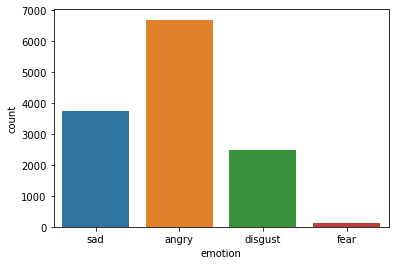

In [49]:
import seaborn as sns
sns.countplot(emotion_comment_df['emotion'])

In [ ]:
# https://github.com/woodongk/news-comments_emotion_classification-CNN-tensorflow/blob/master/03.%20Train%20CNN%20model.ipynb